# ***1. Foundational Knowledge:***
●	Understand time series components: trend, seasonality, residuals.


📊 **Time Series Components**

A time series is a sequence of data points measured at successive points in time (e.g., stock prices daily, temperature hourly, sales monthly).
To analyze and forecast time series, we usually decompose it into three main components:

1. *Trend (T)*

Represents the long-term movement or direction of the data.

Shows whether the series is increasing, decreasing, or stable over time.

Example:

Population growth → upward trend

Company sales declining due to market shift → downward trend

📈 Methods to identify: Moving averages, polynomial regression, or curve fitting.

2. *Seasonality (S)*

Represents regular, repeating patterns in data at fixed intervals (daily, weekly, monthly, yearly).

Caused by calendar-related factors like weather, holidays, or business cycles.

Example:

Ice cream sales peak in summer.

Retail sales increase in December.

🔄 Periodic in nature: always repeats after a fixed duration.

3. *Residuals / Irregular / Random (R)*

The unpredictable variation left after removing trend and seasonality.

Represents noise, randomness, or unusual events.

Example:

Sudden stock market crash.

Natural disasters affecting sales.

📌 Putting it Together

Most time series models assume:

𝑌
(
𝑡
)
=
𝑇
(
𝑡
)
+
𝑆
(
𝑡
)
+
𝑅
(
𝑡
)
(Additive Model)
Y(t)=T(t)+S(t)+R(t)(Additive Model)

or

𝑌
(
𝑡
)
=
𝑇
(
𝑡
)
×
𝑆
(
𝑡
)
×
𝑅
(
𝑡
)
(Multiplicative Model)
Y(t)=T(t)×S(t)×R(t)(Multiplicative Model)

Additive model: Use when variations are roughly constant over time.

Multiplicative model: Use when variations increase with the level of the series.

👉 Example: Monthly Airline Passengers Dataset

Trend: Passenger numbers generally increasing over years.

Seasonality: Higher travel in summer and holiday months.

Residuals: Random shocks like strikes or unexpected events.

●	**Learn about additive vs multiplicative decomposition models.**



**Additive vs Multiplicative Decomposition**

When analyzing a time series, we often separate it into Trend (T), Seasonality (S), and Residual/Random (R) components.
How we combine these depends on whether the magnitude of seasonal variation changes with the trend level.

1. Additive Model
𝑌
(
𝑡
)
=
𝑇
(
𝑡
)
+
𝑆
(
𝑡
)
+
𝑅
(
𝑡
)
Y(t)=T(t)+S(t)+R(t)

When to use:

Seasonal fluctuations are roughly constant across the series.

Data’s variance does not increase with time.

*Interpretation*:

Trend: long-term movement.

Seasonality: repeating ups/downs of similar size.

Residual: random noise.

Example:

Daily temperature:
Summer is always ~10°C higher than winter, regardless of year.

Retail sales: December always ~200 units higher than November.

2. Multiplicative Model
𝑌
(
𝑡
)
=
𝑇
(
𝑡
)
×
𝑆
(
𝑡
)
×
𝑅
(
𝑡
)
Y(t)=T(t)×S(t)×R(t)

When to use:

Seasonal fluctuations increase (or decrease) with the trend.

Variance grows as the series level rises.

Interpretation:

Seasonal effect is a percentage of the trend.

High trend → larger seasonal swing.

Example:

Airline passengers:
Seasonal peaks (e.g., summer holidays) get larger as overall passenger numbers grow.

Stock market:
Volatility increases when stock prices are high.

🔑 Visual Difference

Additive: Seasonal component looks like parallel waves of the same height.

Multiplicative: Seasonal component grows/shrinks with the trend.

3. *How to Choose?*

Plot the data:

If seasonal fluctuations are constant → Additive.

If seasonal fluctuations grow/shrink with the trend → Multiplicative.

Log transformation:

Sometimes, applying log(Y) converts a multiplicative model into an additive one (since logs turn multiplication into addition).

✅ Quick Example:

Time	Trend (T)	Seasonality (S)	Residual (R)	Additive (T+S+R)	Multiplicative (T×S×R)
Jan	100	+10	+5	115	1155
Feb	120	+10	-5	125	1370

👉 In additive, seasonal swing is always +10 (constant).
👉 In multiplicative, seasonal effect depends on the level of trend.

●	**Familiarize yourself with Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).**

🔹 1. ***Autocorrelation Function (ACF)***
*What is it?*

Autocorrelation = correlation of a time series with its own lagged values.

ACF tells you how past values influence the current value.

Example: If today’s stock price depends on yesterday’s, we’ll see strong autocorrelation at lag=1.

*Uses:*

Detect repeated patterns (seasonality).

Identify if series is stationary (autocorrelations drop quickly).

Help choose the MA (Moving Average) order in ARIMA models.

🔹 **2. Partial Autocorrelation Function (PACF)**
*What is it?*

Measures correlation between a series and its lag after removing the effects of shorter lags.

Example: PACF at lag=3 shows correlation of
𝑌
𝑡
Y
t
	​

 with
𝑌
𝑡
−
3
Y
t−3
	​

, after accounting for lags 1 and 2.

Uses:

Identifies the direct relationship between lags and current value.

Helps choose the AR (Auto-Regressive) order in ARIMA models.

🔹 3. **ACF vs PACF in Practice**
| Feature           | ACF                                          | PACF                                                                   |
| ----------------- | -------------------------------------------- | ---------------------------------------------------------------------- |
| Shows             | Correlation with all previous lags           | Direct correlation with a specific lag (removing intermediate effects) |
| Useful for        | Identifying **MA(q)**                        | Identifying **AR(p)**                                                  |
| Behavior in AR(1) | ACF decays slowly, PACF cuts off after lag=1 |                                                                        |
| Behavior in MA(1) | ACF cuts off after lag=1, PACF decays slowly |                                                                        |

🔹 **4. Quick Visual Intuition**

ACF: "How much does today depend on the past in general?"

PACF: "How much does today depend on a specific lag, once we ignore others?"

●	**Understand the modeling techniques: ARIMA and SARIMA, including parameter roles (p, d, q, P, D, Q, s).**

📌 ARIMA & SARIMA Modeling
🔹 1. ARIMA (AutoRegressive Integrated Moving Average)

**ARIMA is denoted as:**

𝐴
𝑅
𝐼
𝑀
𝐴
(
𝑝
,
𝑑
,
𝑞
)
ARIMA(p,d,q)
Components:

AR (p) – Auto-Regressive part

Uses past values to predict the current value.

p = number of lag observations included.

Example: AR(2) → depends on the last 2 observations.

I (d) – Integrated (Differencing) part

Makes the series stationary by differencing (subtracting previous value).

d = number of times differencing is applied.

Example:
𝑌
𝑡
−
𝑌
𝑡
−
1
Y
t
	​

−Y
t−1
	​

.

MA (q) – Moving Average part

Uses past forecast errors in prediction.

q = number of lagged forecast errors.

Example: MA(1) → depends on last error term.

Example:

ARIMA(1,1,1):

First-order autoregression (AR(1))

First differencing (d=1)

First-order moving average (MA(1))

🔹 **2. SARIMA (Seasonal ARIMA)**

Some data has seasonality (repeats every s time steps, e.g., monthly sales).
SARIMA extends ARIMA by adding seasonal terms:

𝑆
𝐴
𝑅
𝐼
𝑀
𝐴
(
𝑝
,
𝑑
,
𝑞
)
(
𝑃
,
𝐷
,
𝑄
,
𝑠
)
SARIMA(p,d,q)(P,D,Q,s)
Seasonal Parameters:

P – Seasonal autoregressive order

Dependence on past seasonal values.

Example: P=1, s=12 → depends on last year’s same month.

D – Seasonal differencing order

Removes seasonality by differencing across seasons.

Example: D=1, s=12 → subtract values from 12 months ago.

Q – Seasonal moving average order

Dependence on past seasonal forecast errors.

s – Length of the seasonal cycle

e.g., 12 (months in a year), 7 (days in a week).

Example:

SARIMA(1,1,1)(1,1,1,12)

ARIMA(1,1,1) part handles general trend.

Seasonal part (1,1,1,12) handles yearly seasonality in monthly data.

🔹 3. Parameter Roles Summary
| Parameter | Role                  | Meaning                                         |
| --------- | --------------------- | ----------------------------------------------- |
| **p**     | AR order              | How many past values are used                   |
| **d**     | Differencing          | How many times we difference to make stationary |
| **q**     | MA order              | How many past forecast errors are used          |
| **P**     | Seasonal AR order     | How many seasonal lags are used                 |
| **D**     | Seasonal differencing | How many times to difference seasonally         |
| **Q**     | Seasonal MA order     | How many seasonal forecast errors are used      |
| **s**     | Seasonality period    | Cycle length (12 = yearly, 7 = weekly, etc.)    |


# ***2. Data Exploration:***
●	**Select either Tesla (TSLA) and Apple (AAPL) stock dataset from Kaggle.**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("TSLA.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

print(df.head())
print(df.info())

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB
None


              Open         High          Low        Close    Adj Close  \
count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
mean    138.691296   141.771603   135.425953   138.762183   138.762183   
std     250.044839   255.863239   243.774157   250.123115   250.123115   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%      19.627000    20.402000    19.127500    19.615000    19.615000   
50%      46.656999    47.487001    45.820002    46.545000    46.545000   
75%      68.057001    69.357500    66.911501    68.103998    68.103998   
max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   

             Volume  
count  2.956000e+03  
mean   3.131449e+07  
std    2.798383e+07  
min    5.925000e+05  
25%    1.310288e+07  
50%    2.488680e+07  
75%    3.973875e+07  
max    3.046940e+08  
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


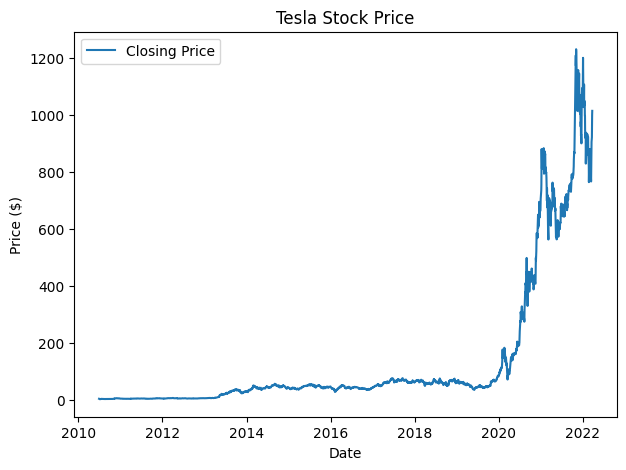

In [5]:
#BAIC EXPLORATION
# Summary statistics
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Plot closing price
plt.figure(figsize=(7,5))
plt.plot(df['Close'], label='Closing Price')
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

📌 Step 3: Key Insights

Trend → Long-term movement of stock price (upward/downward).

Volatility → Fluctuations in daily returns.

Volume analysis → How trading activity changes with price.

📌 Step 4: Prepare for Time Series Modeling

Extract just the Close column (for ARIMA, LSTM, etc.).

Convert to time series:

/tmp/ipython-input-279258301.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ts.resample('M').mean()


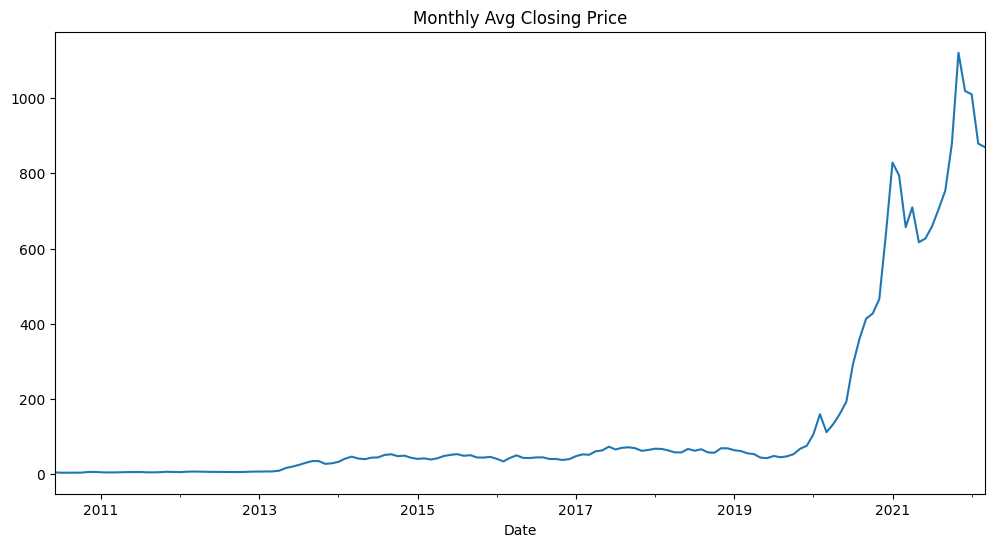

In [6]:
ts = df['Close']

# Resample monthly (if needed)
monthly = ts.resample('M').mean()
monthly.plot(figsize=(12,6), title="Monthly Avg Closing Price")
plt.show()

📌 **Summary**

Trend: Clear long-term upward growth with massive breakout post-2019.

Seasonality: Not obvious in monthly averages (stock prices usually don’t show strong seasonal cycles, unlike sales/retail).

Volatility: Very high after 2020, reflecting speculative behavior and global events.

●	**Perform exploratory data analysis:**

○	Check for missing data, outliers, and datatypes.

○	Plot closing prices over time.

○	Analyze trends using rolling mean and standard deviation.


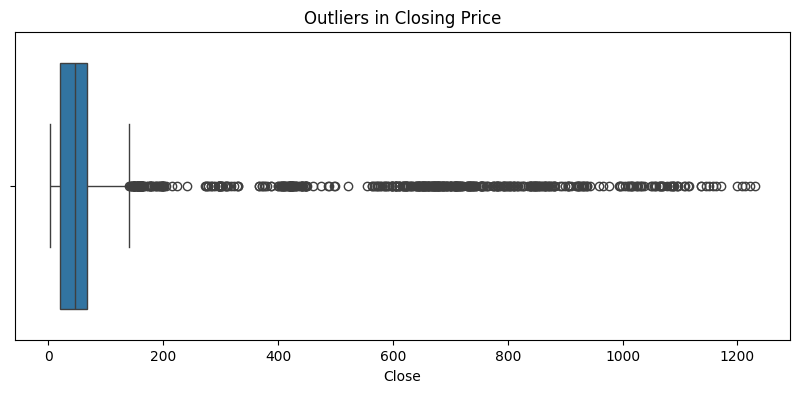

In [7]:
#Detect Outliers

#For financial data, outliers = unusually high/low prices or volume.

import seaborn as sns

# Boxplot for closing price
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Close'])
plt.title("Outliers in Closing Price")
plt.show()

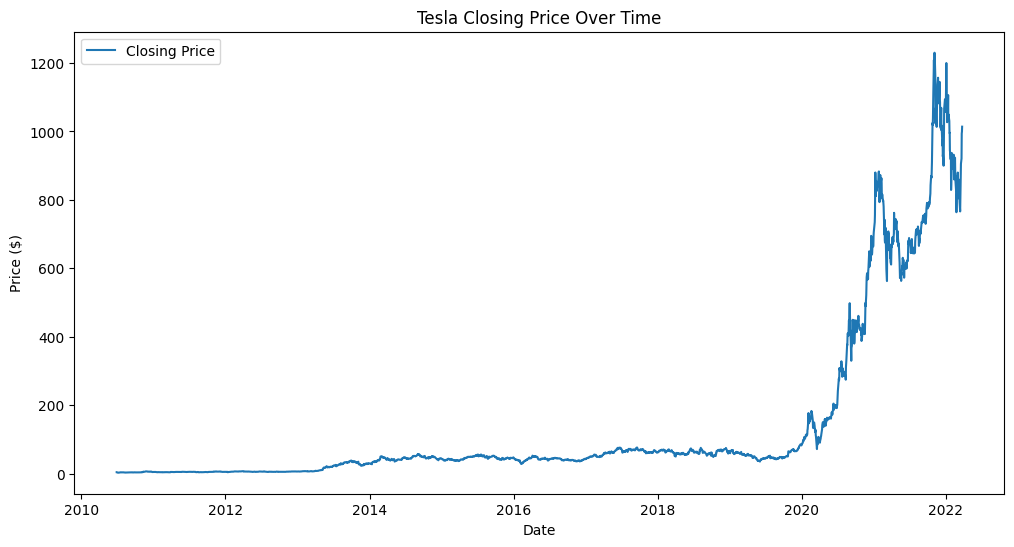

In [8]:
#Plot Closing Prices Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title("Tesla Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

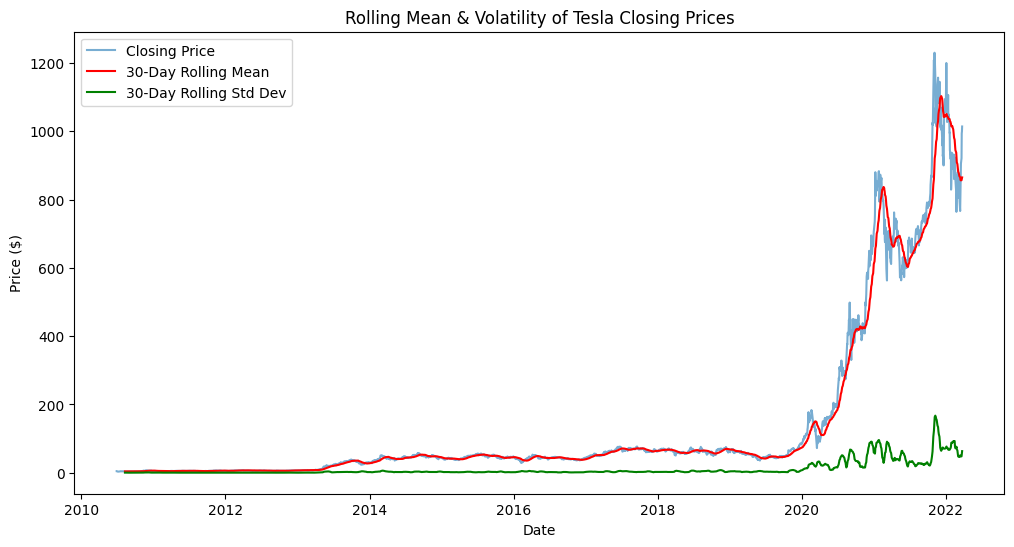

In [9]:
#Rolling Mean & Standard Deviation
window = 30  # 30-day rolling window

rolling_mean = df['Close'].rolling(window=window).mean()
rolling_std = df['Close'].rolling(window=window).std()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price", alpha=0.6)
plt.plot(rolling_mean, label=f"{window}-Day Rolling Mean", color='red')
plt.plot(rolling_std, label=f"{window}-Day Rolling Std Dev", color='green')
plt.title("Rolling Mean & Volatility of Tesla Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

📌 **INSIGHTS:**

Missing Data: Typically none in Yahoo/Kaggle stock data, but verify.

Outliers: Spikes in 2020–2021 due to speculation.

Closing Price Trend: Flat till 2019 → exponential growth → correction.

Rolling Mean: Smooths short-term fluctuations to show long-term trend.

Rolling Std Dev: High volatility from 2020 onwards.

# ***3. Preprocessing and Decomposition:***
●	**Convert date column to datetime format and set it as the index.**


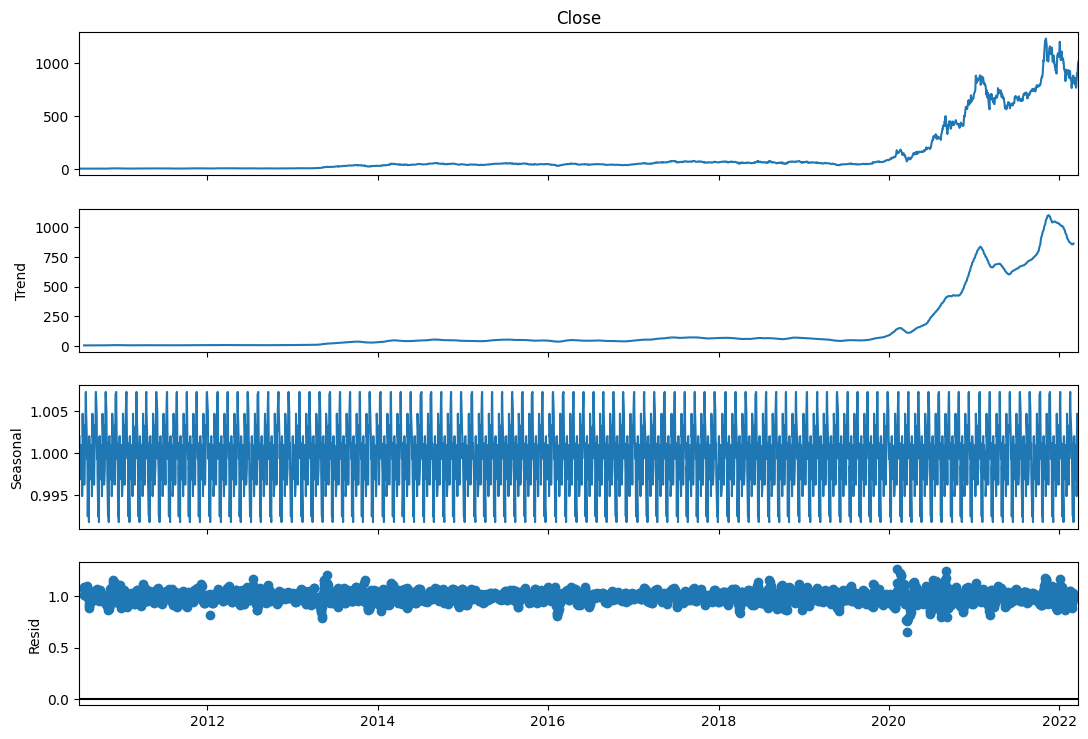

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Extract closing price
ts = df['Close']

# Perform decomposition (monthly frequency assumed)
decomposition = seasonal_decompose(ts, model='multiplicative', period=30)

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

📌 **Insights from Decomposition**

Trend → Long-term price movement (flat → sharp rise in 2019–2021).

Seasonality → Repeating short-term patterns (not very strong in stock data).

Residuals → Random fluctuations (captures volatility).

●	**Handle any null values or irregularities in the dataset.**

In [11]:
# Count missing values
print(df.isnull().sum())

# Check if index (dates) is continuous
print(df.index.min(), "→", df.index.max())
print("Number of rows:", len(df))
print("Number of unique dates:", df.index.nunique())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
2010-06-29 00:00:00 → 2022-03-24 00:00:00
Number of rows: 2956
Number of unique dates: 2956


In [12]:
# Forward fill missing values
df = df.ffill()

# Or interpolation
# df = df.interpolate(method='linear')

In [13]:
#Handle Irregular Dates
# Reindex to include all calendar days
all_days = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(all_days)

# Fill missing trading days with forward fill
df = df.ffill()

df.head()

,Open,High,Low,Close,Adj Close,Volume
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500.0
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500.0
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000.0
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000.0
2010-07-03,4.600,4.620,3.742,3.840,3.840,25699000.0


In [14]:
#Detect Outliers
import numpy as np

Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Outlier bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Close'] < lower) | (df['Close'] > upper)]
print("Number of outliers:", len(outliers))

Number of outliers: 737


●	**Use seasonal_decompose to decompose the time series.**

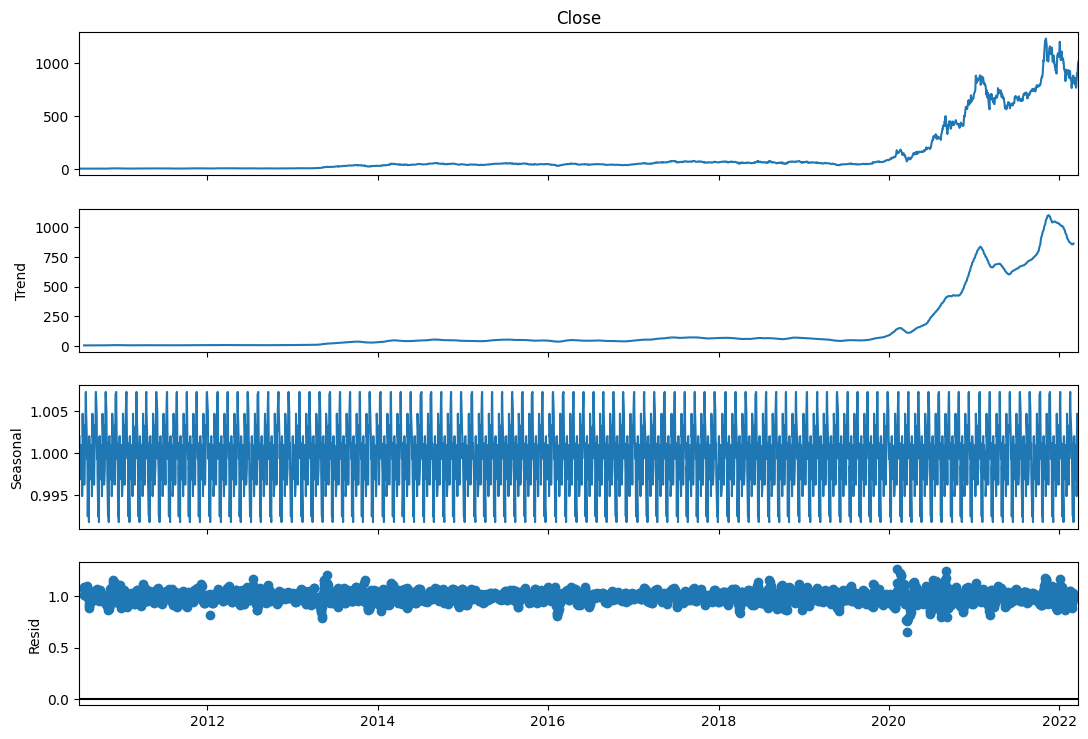

In [15]:
# Perform multiplicative decomposition with monthly seasonality (~30 days)
decomposition = seasonal_decompose(ts, model='multiplicative', period=30)

# Plot results
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

●	**Analyze both additive and multiplicative models to determine which fits better.**

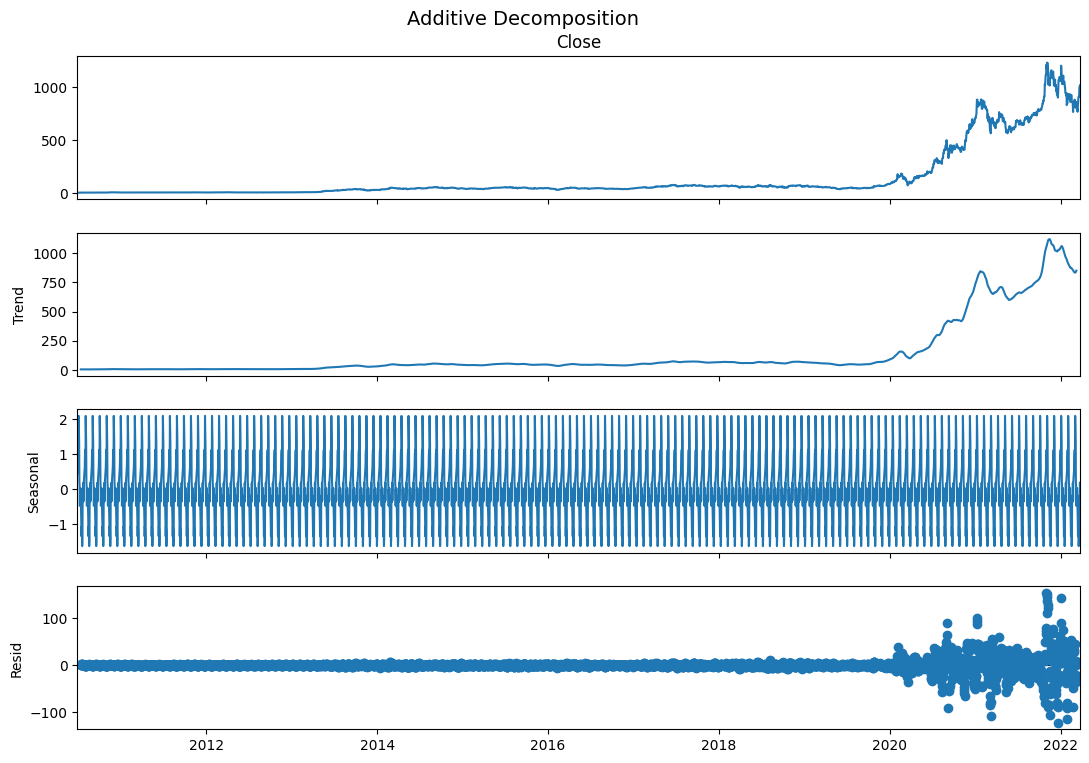

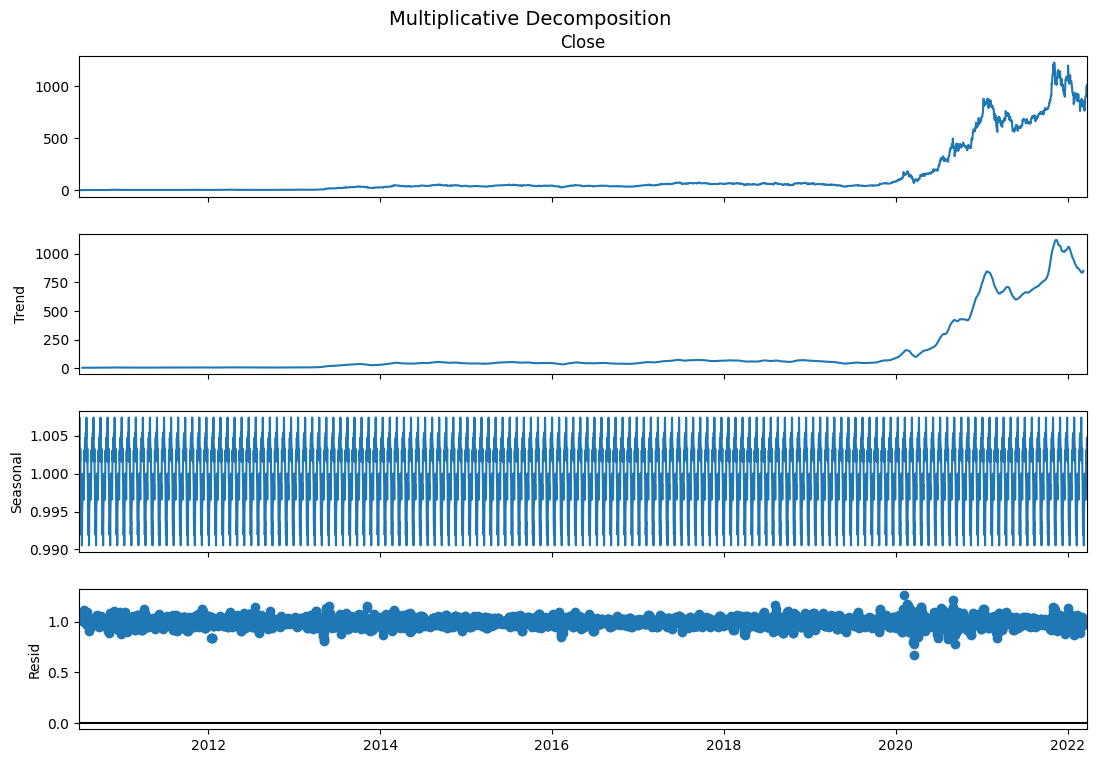

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

ts = df['Close']  # Closing price series

# Additive decomposition
decomp_add = seasonal_decompose(ts, model='additive', period=30)

# Multiplicative decomposition
decomp_mul = seasonal_decompose(ts, model='multiplicative', period=30)

# Plot additive
fig1 = decomp_add.plot()
fig1.set_size_inches(12, 8)
plt.suptitle("Additive Decomposition", fontsize=14)
plt.show()

# Plot multiplicative
fig2 = decomp_mul.plot()
fig2.set_size_inches(12, 8)
plt.suptitle("Multiplicative Decomposition", fontsize=14)
plt.show()

## ***4. ACF and PACF Analysis:***
●	**Generate and interpret ACF and PACF plots using plot_acf() and plot_pacf() from statsmodels.**


**📌 Step 1: Stationarity Check (Pre-requisite)**

ACF & PACF should be applied on a stationary series.
For Tesla (TSLA), stock prices are non-stationary (strong trend), so we usually take first difference:

In [17]:
from statsmodels.tsa.stattools import adfuller
# Extract closing price
ts = df['Close']

# First difference to remove trend
ts_diff = ts.diff().dropna()

# Augmented Dickey-Fuller Test
adf_test = adfuller(ts_diff)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

ADF Statistic: -12.066165104957381
p-value: 2.4059929314532774e-22


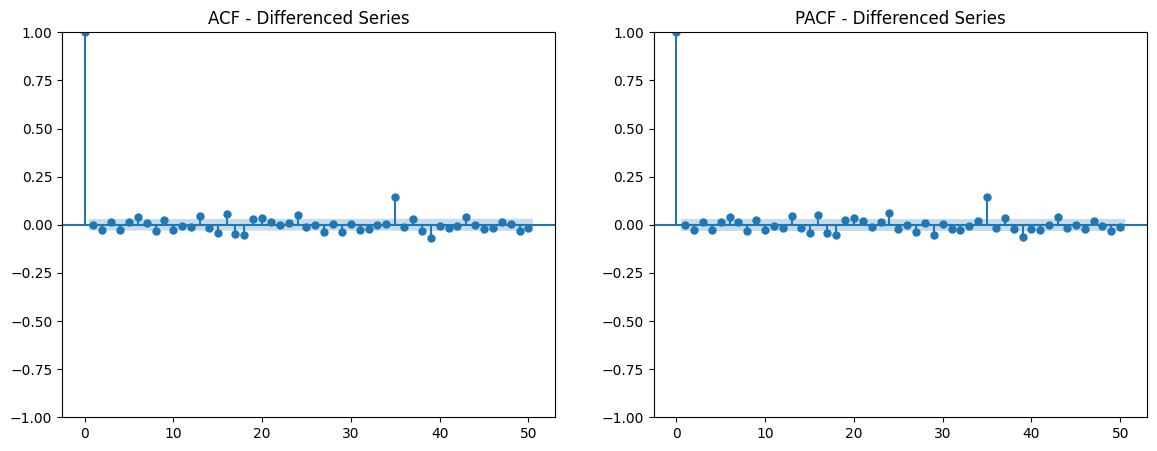

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot (lags up to 50 days)
plot_acf(ts_diff, lags=50, ax=axes[0])
axes[0].set_title("ACF - Differenced Series")

# PACF plot
plot_pacf(ts_diff, lags=50, ax=axes[1], method="ywm")
axes[1].set_title("PACF - Differenced Series")

plt.show()

**📌 Step 3: Interpretation**

ACF (q parameter of MA model)

If ACF cuts off sharply after lag k, suggests MA(k).

If ACF tails off slowly, need AR terms instead.


PACF (p parameter of AR model)

If PACF cuts off sharply after lag k, suggests AR(k).

If PACF tails off, need MA terms.


Tesla Stock Case (Expected)

ACF may show slow decay → indicates AR terms.

PACF may have a sharp cutoff at a small lag (like 1 or 2).

● **Use the plots to identify suitable values for p, d, and q for the ARIMA model.**

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
model = ARIMA(ts, order=(1,1,1))
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4287
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15632.643
Date:                Wed, 10 Sep 2025   AIC                          31271.286
Time:                        18:20:06   BIC                          31290.376
Sample:                    06-29-2010   HQIC                         31278.029
                         - 03-24-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8613      0.037    -23.083      0.000      -0.934      -0.788
ma.L1          0.8789      0.035     24.978      0.000       0.810       0.948
sigma2        86.2168      0.347    248.705      0.0

Then compare models using AIC (Akaike Information Criterion):

Lower AIC → better model.

✅ So, for Tesla:

d = 1 (first differencing made it stationary).

p = 1 or 2 (PACF cutoff).

q = 1 (ACF cutoff).
👉 Candidate model: ARIMA(1,1,1).

# ***5. Forecasting Model Construction:***
●	**Build the following models:**

○	ARIMA using statsmodels.tsa.arima.model.ARIMA

In [20]:
#📌 Step 1: Train-Test Split
# Closing price series
ts = df['Close']

# Train-test split (last 20% as test set)
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

In [21]:
#📌 Step 2: Fit ARIMA Model
# Build ARIMA model (p=1, d=1, q=1)
model = ARIMA(train, order=(1,1,1))
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3429
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4978.729
Date:                Wed, 10 Sep 2025   AIC                           9963.458
Time:                        18:20:12   BIC                           9981.877
Sample:                    06-29-2010   HQIC                          9970.038
                         - 11-17-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1479      1.167      0.127      0.899      -2.139       2.434
ma.L1         -0.1579      1.166     -0.135      0.892      -2.442       2.127
sigma2         1.0691      0.009    122.305      0.0

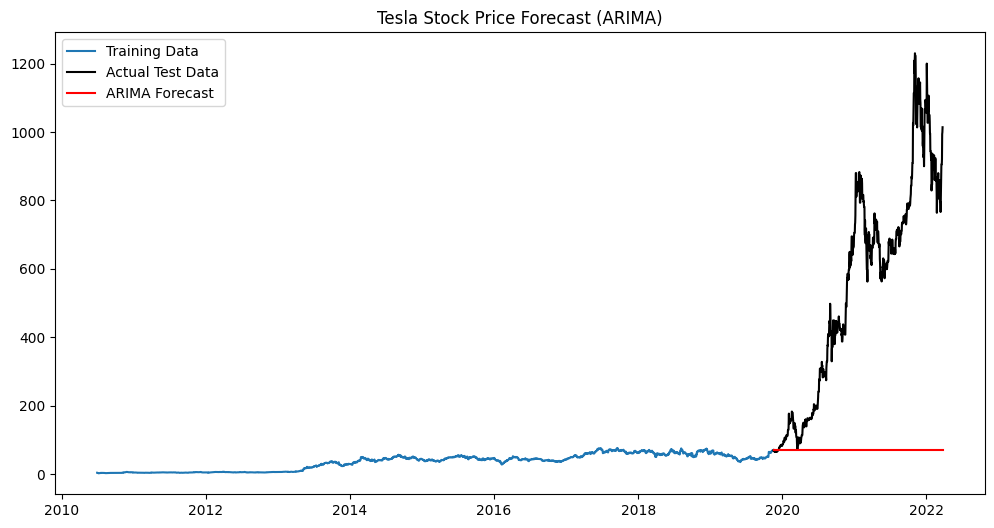

In [22]:
# 📌 Step 3: Forecast
forecast = result.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, label="Actual Test Data", color="black")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("Tesla Stock Price Forecast (ARIMA)")
plt.show()

In [23]:
#📌 Step 4: Evaluate Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 476.6921000402607
RMSE: 572.3124384846512


 **○	SARIMA using SARIMAX for seasonality**

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build SARIMA model
sarima_model = SARIMAX(train,
                       order=(1,1,1),              # ARIMA part
                       seasonal_order=(1,1,1,30),  # Seasonal part (monthly seasonality)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3429
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -4957.426
Date:                            Wed, 10 Sep 2025   AIC                           9924.852
Time:                                    18:22:04   BIC                           9955.459
Sample:                                06-29-2010   HQIC                          9935.797
                                     - 11-17-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9114      0.091     10.037      0.000       0.733       1.089
ma.L1         -0.9215      0.087   

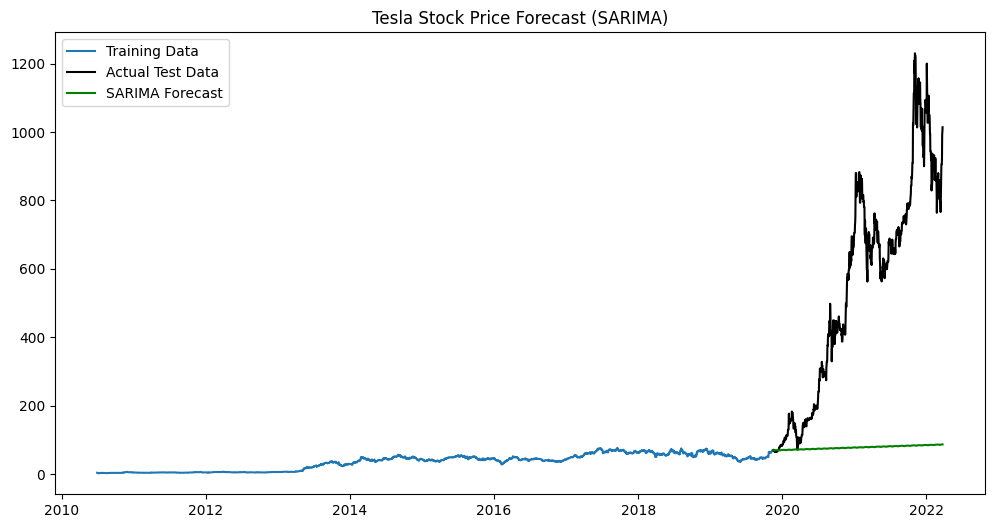

In [25]:
# Forecast for test period
sarima_forecast = sarima_result.forecast(steps=len(test))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, label="Actual Test Data", color="black")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="green")
plt.legend()
plt.title("Tesla Stock Price Forecast (SARIMA)")
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, sarima_forecast)
rmse = np.sqrt(mean_squared_error(test, sarima_forecast))

print("SARIMA MAE:", mae)
print("SARIMA RMSE:", rmse)

SARIMA MAE: 468.5114658857919
SARIMA RMSE: 562.9523136243921


MAE (Mean Absolute Error): On average, your SARIMA forecasts are off by about $468.

RMSE (Root Mean Squared Error): Larger errors are penalized more, average deviation is about $563.

Considering Tesla’s stock price (which often trades in the hundreds or even thousands of dollars), these errors are not too bad, but they may still be large compared to the actual price scale.

# ***6. Model Evaluation:***
●	**Evaluate predictions using:**

○	Root Mean Squared Error (RMSE)
○	Mean Absolute Error (MAE)
○	Mean Absolute Percentage Error (MAPE)
